<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# ROC and precision recall demo

---

## Learning Objectives

### Core
- Understand how binary logistic regression can be used for multiple class classification through the one-versus-rest approach
- Interpret the sets of coefficients related to each one-versus-rest fit


### Target
- Use the `LabelBinarizer` to create labels for the one-versus-rest binary classification problems
- Calculate precision and recall scores with different averages

### Stretch
- Create ROC and precision-recall curves for all one-versus rest problems

<h1>Lesson Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Learning-Objectives" data-toc-modified-id="Learning-Objectives-1">Learning Objectives</a></span><ul class="toc-item"><li><span><a href="#Core" data-toc-modified-id="Core-1.1">Core</a></span></li><li><span><a href="#Target" data-toc-modified-id="Target-1.2">Target</a></span></li><li><span><a href="#Stretch" data-toc-modified-id="Stretch-1.3">Stretch</a></span></li></ul></li><li><span><a href="#Load-the-iris-dataset" data-toc-modified-id="Load-the-iris-dataset-2">Load the iris dataset</a></span></li><li><span><a href="#Fit-a-logistic-regression-model" data-toc-modified-id="Fit-a-logistic-regression-model-3">Fit a logistic regression model</a></span><ul class="toc-item"><li><span><a href="#Define-target-and-predictors" data-toc-modified-id="Define-target-and-predictors-3.1">Define target and predictors</a></span></li><li><span><a href="#Rescale-the-data" data-toc-modified-id="Rescale-the-data-3.2">Rescale the data</a></span></li><li><span><a href="#Fit-the-model,-obtain-the-score-and-predictions" data-toc-modified-id="Fit-the-model,-obtain-the-score-and-predictions-3.3">Fit the model, obtain the score and predictions</a></span></li></ul></li><li><span><a href="#Model-coefficients-and-predicted-probabilities" data-toc-modified-id="Model-coefficients-and-predicted-probabilities-4">Model coefficients and predicted probabilities</a></span><ul class="toc-item"><li><span><a href="#We-have-three-different-intercepts" data-toc-modified-id="We-have-three-different-intercepts-4.1">We have three different intercepts</a></span></li><li><span><a href="#We-have-three-sets-of-four-model-coefficients" data-toc-modified-id="We-have-three-sets-of-four-model-coefficients-4.2">We have three sets of four model coefficients</a></span></li><li><span><a href="#We-have-a-probability-for-being-in-any-of-the-three-classes" data-toc-modified-id="We-have-a-probability-for-being-in-any-of-the-three-classes-4.3">We have a probability for being in any of the three classes</a></span></li><li><span><a href="#Along-each-row,-the-predictions-sum-up-to-one" data-toc-modified-id="Along-each-row,-the-predictions-sum-up-to-one-4.4">Along each row, the predictions sum up to one</a></span></li></ul></li><li><span><a href="#Check-results-by-fitting-one-versus-rest-explicitly" data-toc-modified-id="Check-results-by-fitting-one-versus-rest-explicitly-5">Check results by fitting one-versus-rest explicitly</a></span><ul class="toc-item"><li><span><a href="#Label-binarize-the-target" data-toc-modified-id="Label-binarize-the-target-5.1">Label binarize the target</a></span></li><li><span><a href="#Fit-each-of-the-classes-one-versus-rest" data-toc-modified-id="Fit-each-of-the-classes-one-versus-rest-5.2">Fit each of the classes one-versus-rest</a></span></li></ul></li><li><span><a href="#Accuracy-score,-confusion-matrix-and-classification-report" data-toc-modified-id="Accuracy-score,-confusion-matrix-and-classification-report-6">Accuracy score, confusion matrix and classification report</a></span><ul class="toc-item"><li><span><a href="#Default-model-score-(accuracy)" data-toc-modified-id="Default-model-score-(accuracy)-6.1">Default model score (accuracy)</a></span></li><li><span><a href="#Confusion-matrix" data-toc-modified-id="Confusion-matrix-6.2">Confusion matrix</a></span></li><li><span><a href="#Classification-report" data-toc-modified-id="Classification-report-6.3">Classification report</a></span></li></ul></li><li><span><a href="#Precision-scores" data-toc-modified-id="Precision-scores-7">Precision scores</a></span><ul class="toc-item"><li><span><a href="#Scores-without-averaging" data-toc-modified-id="Scores-without-averaging-7.1">Scores without averaging</a></span></li><li><span><a href="#The-macro-average" data-toc-modified-id="The-macro-average-7.2">The macro average</a></span></li><li><span><a href="#The-micro-average" data-toc-modified-id="The-micro-average-7.3">The micro average</a></span></li><li><span><a href="#The-weighted-average" data-toc-modified-id="The-weighted-average-7.4">The weighted average</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-7.5">Summary</a></span></li></ul></li><li><span><a href="#Recall-scores" data-toc-modified-id="Recall-scores-8">Recall scores</a></span></li><li><span><a href="#F1-scores" data-toc-modified-id="F1-scores-9">F1 scores</a></span></li><li><span><a href="#Precision-Recall-Plot" data-toc-modified-id="Precision-Recall-Plot-10">Precision-Recall Plot</a></span></li><li><span><a href="#ROC-plot" data-toc-modified-id="ROC-plot-11">ROC plot</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-12">Conclusion</a></span></li><li><span><a href="#Additional-Resources" data-toc-modified-id="Additional-Resources-13">Additional Resources</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(precision=4)
plt.style.use('ggplot')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Load the iris dataset

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()

In [4]:
print(data.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

## Fit a logistic regression model

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

### Define target and predictors

The classes are completely balanced. For illustration purposes, we
create a subset with class imbalance.

In [6]:
# the classes are completely balanced
# create a subset with class imbalance
y = data.target[:-20]
X = data.data[:-20]

In [7]:
np.unique(y)

array([0, 1, 2])

In [8]:
# check how many items we have per class
pd.Series(y).value_counts()

1    50
0    50
2    30
dtype: int64

In [9]:
# we have four predictors
X.shape

(130, 4)

### Rescale the data

In [10]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Fit the model, obtain the score and predictions

In [11]:
model = LogisticRegression()
model.fit(X, y)
print(model.score(X, y))
predictions = model.predict(X)

0.9384615384615385


## Model coefficients and predicted probabilities

Logistic regression uses one-versus-rest for making predictions.

### We have three different intercepts

In [12]:
print(model.intercept_)

[-1.1665 -0.6781 -3.0792]


### We have three sets of four model coefficients

In [13]:
print(model.coef_)

[[-0.8433  1.3671 -1.6575 -1.5793]
 [ 0.1348 -1.2544  0.8307 -0.6098]
 [ 0.0219 -0.0628  1.3202  2.2715]]


### We have a probability for being in any of the three classes

In [14]:
print(model.predict_proba(X)[:10])

[[9.1470e-01 8.4771e-02 5.2527e-04]
 [7.7350e-01 2.2602e-01 4.8487e-04]
 [8.5098e-01 1.4855e-01 4.6915e-04]
 [8.1004e-01 1.8943e-01 5.2892e-04]
 [9.3374e-01 6.5730e-02 5.2578e-04]
 [9.6674e-01 3.2017e-02 1.2428e-03]
 [9.0647e-01 9.2816e-02 7.1250e-04]
 [8.9026e-01 1.0918e-01 5.5945e-04]
 [7.5010e-01 2.4943e-01 4.6737e-04]
 [7.9364e-01 2.0598e-01 3.8254e-04]]


### Along each row, the predictions sum up to one

In [15]:
print(model.predict_proba(X)[:10].sum(axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Check results by fitting one-versus-rest explicitly

The three sets of coefficients arise by considering the binary classification problem of being or not being in one of the three classes. This approach is **called one-versus-rest**.

Let's check that it leads to the same results.

To be able to treat the multi-class problem, we use [`label_binarize`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.label_binarize.html#sklearn.preprocessing.label_binarize) to transform the outcome variable.

[Sklearn Precision-recall for multiple classes](http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)

In [16]:
from sklearn.preprocessing import label_binarize

### Label binarize the target

In [17]:
# returns an array with three columns indicating being or not being in class 1, 2 or 3
y_bin = label_binarize(y, model.classes_)
y_bin[:10]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

### Fit each of the classes one-versus-rest

In [18]:
model_class = {}
for i in model.classes_:
    model_class[i] = LogisticRegression()
    model_class[i].fit(X, y_bin[:, i])
    print(model_class[i].coef_)
    print('The coefficients agree with the multiclass prediction:')
    print(np.allclose(model_class[i].coef_, model.coef_[i, :]))
    print()

[[-0.8433  1.3671 -1.6575 -1.5793]]
The coefficients agree with the multiclass prediction:
True

[[ 0.1348 -1.2544  0.8307 -0.6098]]
The coefficients agree with the multiclass prediction:
True

[[ 0.0219 -0.0628  1.3202  2.2715]]
The coefficients agree with the multiclass prediction:
True



## Accuracy score, confusion matrix and classification report

### Default model score (accuracy)

In [19]:
# sklearn model
print(model.score(X, y))

0.9384615384615385


In [20]:
# accuracy from comparison of true and predicted values
print(metrics.accuracy_score(y, predictions))

0.9384615384615385


### Confusion matrix

The argument `labels` fixes the order of the labels.

In [21]:
confusion_matrix = metrics.confusion_matrix(y, predictions, labels=[0, 1, 2])
print(confusion_matrix)

[[50  0  0]
 [ 0 46  4]
 [ 0  4 26]]


### Classification report

In [22]:
print(metrics.classification_report(y, predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.92      0.92      0.92        50
          2       0.87      0.87      0.87        30

avg / total       0.94      0.94      0.94       130



## Precision scores

The precision can be calculated using the function `precision_score` from sklearn's metrics-module. With the `average`-argument, we can specify what kind of precision value we want to calculate. The default `binary` works only for two-class problems. In our case with three classes, we have to adjust this argument.

In [23]:
# Running this command would complain with 
# "Target is multiclass but average='binary'."

#metrics.precision_score(y, predictions)

The three precision scores in the classification report are obtained if one considers one of the three classes and considers the number of true and false predictions for that class. 

### Scores without averaging

Here we set `average=None`.

In [24]:
# by hand
[confusion_matrix[i, i]/confusion_matrix[:, i].sum()
 for i in range(len(confusion_matrix))]

[1.0, 0.92, 0.8666666666666667]

In [25]:
# with sklearn
precision_scores = metrics.precision_score(y, predictions, average=None)
print(precision_scores)

[1.     0.92   0.8667]


### The macro average

The **macro average** takes the mean of these three precision scores

In [26]:
# by hand
print(precision_scores.mean())

0.9288888888888889


In [27]:
# with sklearn
print(metrics.precision_score(y, predictions, average='macro'))

0.9288888888888889


### The micro average

The **micro average** sums all true positives and divides 
by the sum of all true positive and false positives

In [28]:
# by hand
np.diag(confusion_matrix).sum()/confusion_matrix.sum()

0.9384615384615385

In [29]:
# with sklearn
print(metrics.precision_score(y, predictions, average='micro'))

0.9384615384615385


### The weighted average

The **weighted average** takes the mean of the three precision scores 
weighted by their frequency. This is the number displayed in the classification report as the average precision score.

In [30]:
# by hand
weights = np.array([50, 50, 30])
print(1./len(y)*np.dot(weights, precision_scores))

0.9384615384615385


In [31]:
# with sklearn
print(metrics.precision_score(y, predictions, average='weighted'))

0.9384615384615385


### Summary

In [32]:
print(metrics.precision_score(y, predictions, average=None))
print(metrics.precision_score(y, predictions, average='macro'))
print(metrics.precision_score(y, predictions, average='micro'))
print(metrics.precision_score(y, predictions, average='weighted'))

[1.     0.92   0.8667]
0.9288888888888889
0.9384615384615385
0.9384615384615385


## Recall scores

The calculations are completely analogous based on recall scores for the individual classes.

In [33]:
print(metrics.recall_score(y, predictions, average=None))
print(metrics.recall_score(y, predictions, average='macro'))
print(metrics.recall_score(y, predictions, average='micro'))
print(metrics.recall_score(y, predictions, average='weighted'))

[1.     0.92   0.8667]
0.9288888888888889
0.9384615384615385
0.9384615384615385


## F1 scores

The calculations are completely analogous based on F1 scores for the individual classes.

In [34]:
print(metrics.f1_score(y, predictions, average=None))
print(metrics.f1_score(y, predictions, average='macro'))
print(metrics.f1_score(y, predictions, average='micro'))
print(metrics.f1_score(y, predictions, average='weighted'))

[1.     0.92   0.8667]
0.9288888888888889
0.9384615384615385
0.9384615384615385


## Precision-Recall Plot

To be able to treat the multi-class problem, we use the binarized variable.

[Sklearn precision-recall plot for multiple classes](http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)

In [35]:
def plot_precision_recall(model, y_bin, X, f1_lines=True):
    '''
    Takes a fitted model, 
    an array of binarised true y-values, 
    a predictor matrix and
    and additional argument if lines of constant f1-score levels should be plotted.
    Returns a precision-recall plot for each of the classes.
    '''

    # create dictionaries for storing precision/recall values
    precision = {}
    recall = {}

    # loop over all the classes
    # calculate precision-recall values for the current class versus the rest
    for i, cl in enumerate(model.classes_):
        precision[cl], recall[cl], threshold = metrics.precision_recall_curve(
            y_bin[:, i], model.predict_proba(X)[:, i])

    # average_precision_score calculates the area under the curve for each class
    average_precision_scores = [round(metrics.average_precision_score(
        y_bin[:, i], model.predict_proba(X)[:, i]), 2) for i in range(len(model.classes_))]

    # plot the precision-recall curves for each class versus the rest
    fig, ax = plt.subplots(figsize=(6,4))
    for i, key in enumerate(precision.keys()):
        ax.plot(precision[key], recall[key], lw=2,
                 label='class {}, average precision score {}'.format(key, average_precision_scores[i]))

    ax.set_ylim([0, 1.05])
    ax.legend(loc=[1,0])
    ax.set_title('Precision-Recall Curve', fontsize=20)
    ax.set_xlabel('Recall', fontsize=18)
    ax.set_ylabel('Precision', fontsize=18)

    # add lines of constant F1 scores
    if f1_lines == True:
        for const in np.linspace(0.2,0.9,8):
            x_vals = np.linspace(0.001, 0.999, 100)
            y_vals = 1./(2./const-1./x_vals)
            ax.plot(x_vals[y_vals > 0], y_vals[y_vals > 0],
                     color='lightblue', ls='--', alpha=0.9)
            ax.set_ylim([0, 1])
            ax.annotate('f1={0:0.1f}'.format(const),
                         xy=(x_vals[-10], y_vals[-2]+0.0))

    return fig, ax

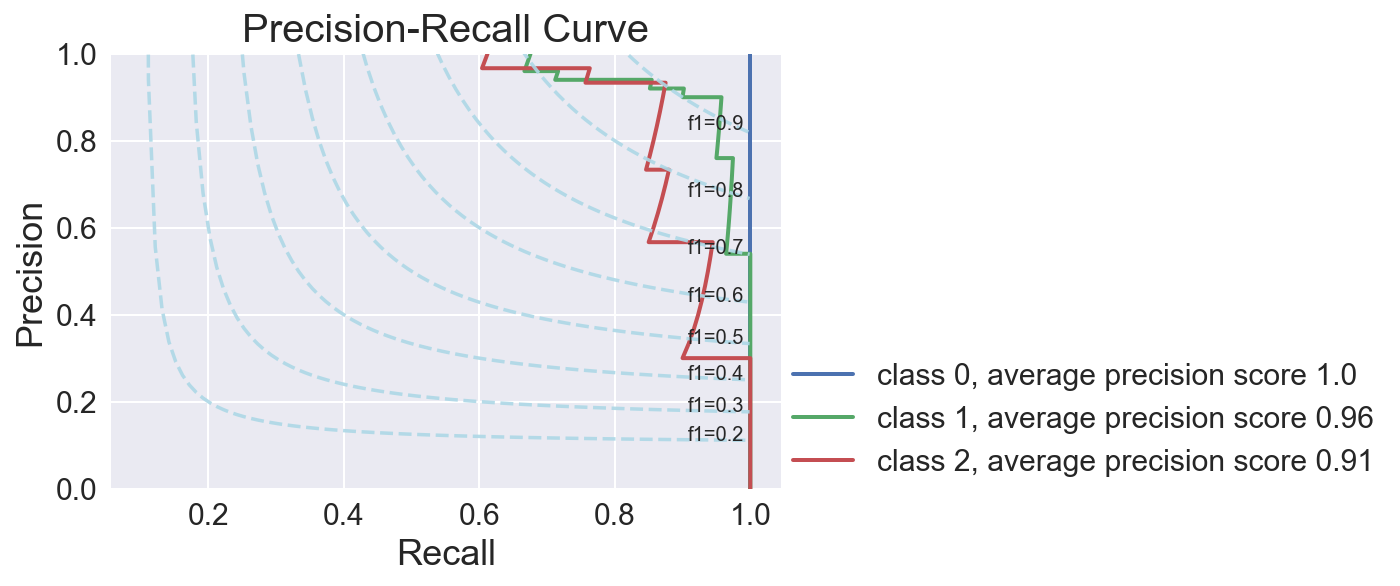

In [36]:
fig, ax = plot_precision_recall(model, y_bin, X)

In [37]:
print('Area under precision-recall curve:')
for i, class_ in enumerate(model.classes_):
    print('Class {}:'.format(class_), round(metrics.average_precision_score(y_bin[:,i],model.predict_proba(X)[:,i]),2))

Area under precision-recall curve:
Class 0: 1.0
Class 1: 0.96
Class 2: 0.91


## ROC plot

[Sklearn ROC plot for multiple classes](http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)

In [38]:
def plot_roc(model, y_bin, X):
    '''
    Takes a fitted model,
    binarised true y-values and
    a predictor matrix.
    Returns a ROC curve for each of the classes.
    '''

    # create dictionaries for storing FPR/TPR values
    fpr = {}
    tpr = {}
    
    # loop over all the classes
    # calculate TPR-FPR values for the current class versus the rest
    for i, cl in enumerate(model.classes_):
        fpr[cl], tpr[cl], threshold = metrics.roc_curve(
            y_bin[:, i], model.predict_proba(X)[:, i])
        
    # roc_auc_score calculates the area under the curve for each class
    auc_scores = [round(metrics.roc_auc_score(y_bin[:, i], model.predict_proba(X)[
                        :, i]), 2) for i in range(len(model.classes_))]
    
    # plot the ROC curve
    fig, ax = plt.subplots()
    for i, key in enumerate(fpr.keys()):
        ax.plot(fpr[key], tpr[key], lw=2,
                 label='class {}, ROC_AUC {}'.format(key, auc_scores[i]))
    ax.plot([0, 1], [0, 1], ls='--', lw=2)
    ax.set_ylim([0, 1.05])
    ax.legend(loc=[1,0])
    ax.set_title('ROC Curve', fontsize=20)
    ax.set_xlabel('FPR', fontsize=18)
    ax.set_ylabel('TPR', fontsize=18)
    
    return fig, ax

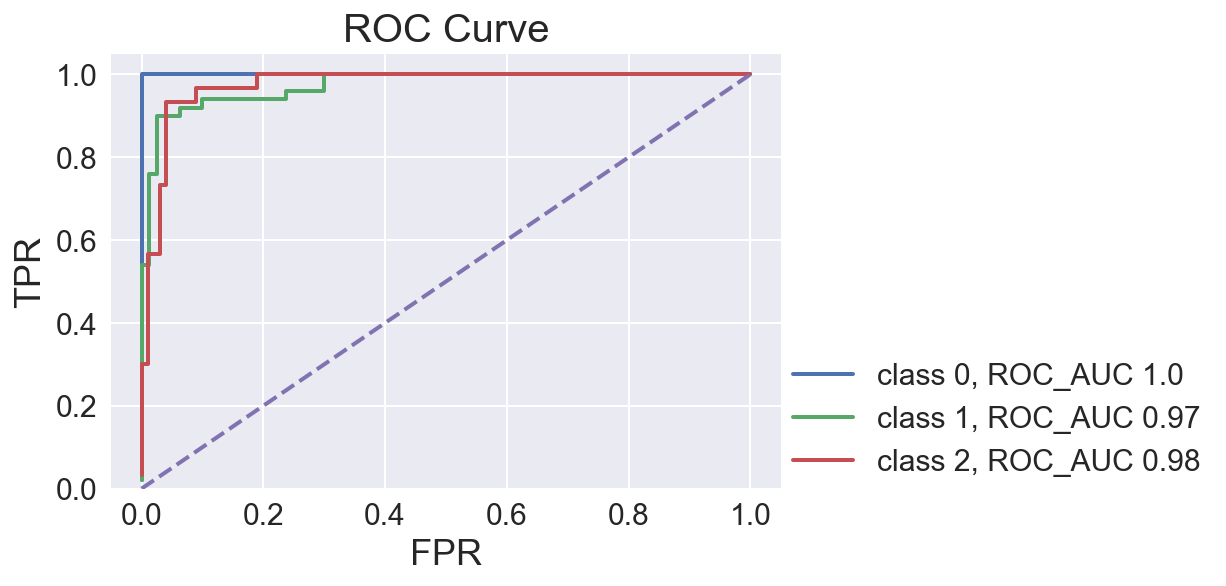

In [39]:
fig, ax = plot_roc(model, y_bin, X);

In [40]:
print('Area under ROC curve (ROC-AUC):')
for i, class_ in enumerate(model.classes_):
    print('Class {}:'.format(class_), round(metrics.roc_auc_score(y_bin[:,i],model.predict_proba(X)[:,i]),2))

Area under ROC curve (ROC-AUC):
Class 0: 1.0
Class 1: 0.97
Class 2: 0.98


## Conclusion

- Classifiers can be fitted on multiple class labels with the one-versus-rest scheme
- Many scores (e.g. precision) require specifying the averaging procedure over classes, distinguish
    - None
    - Macro
    - Micro
    - Weighted
- We can binarize the data to get target variables to set up the one-versus-rest scheme explicitly
- We can obtain precision-recall curves and ROC-curves for each class versus the others

## Additional Resources

- [Label Binarizer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.label_binarize.html#sklearn.preprocessing.label_binarize)
- [Sklearn precision-recall plot for multiple classes](http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)
- [Sklearn ROC plot for multiple classes](http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)
- [ROC-curves on "Towards Data Science"](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)